In [48]:
#Librerias
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# No presentar Advertencia
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)



In [49]:
# Base de datos
datos = pd.read_csv('datos_prueba.csv')
df = pd.DataFrame(datos)
df = df.iloc[:, :]
df.head()

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,stratum,estateFloors,garages,type,City,location
0,874,2.591867e+06,1.917364e+08,195000000,1115.0,2.0,3.0,5.0,NaN,2.0,APA,Medellín,POINT (-75.6356756 6.1266824)
1,33968,4.310643e+06,4.687536e+08,460000000,300.0,2.0,3.0,NaN,NaN,0.0,APA,Medellín,POINT (6.1435762684699 -75.616954237261)
2,33535,4.830501e+06,5.492026e+08,560000000,300.0,2.0,3.0,NaN,NaN,0.0,APA,Medellín,POINT (6.1798535721365 -75.586581230164)
3,33522,3.304656e+06,6.503699e+08,668000000,300.0,2.0,3.0,NaN,3.0,0.0,CAS,Medellín,POINT (4.8687603369878 -74.061080472327)
4,31178,3.758590e+06,2.854634e+08,360000000,300.0,1.0,3.0,NaN,1.0,0.0,CCR,Medellín,POINT (6.21812 -75.604164)


In [50]:
# dimesiones
df.shape

(10574, 13)

In [51]:
# estadisticas
df.describe()

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,stratum,estateFloors,garages
count,10574.000000,1.057400e+04,1.057400e+04,1.057400e+04,8279.000000,10248.000000,10248.000000,4930.000000,3027.000000,10248.000000
mean,21091.402686,3.550403e+06,2.624078e+08,2.922770e+08,86.260659,2.051913,3.000390,3.322312,2.287744,0.599434
std,9240.871374,1.035431e+06,1.409726e+08,1.869719e+08,58.067410,0.844640,0.871011,1.046383,0.914084,0.754847
min,8.000000,1.301262e+06,4.528172e+07,1.010000e+07,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15413.500000,2.828663e+06,1.541398e+08,1.700000e+08,52.000000,2.000000,3.000000,3.000000,2.000000,0.000000
50%,21663.000000,3.393013e+06,2.262070e+08,2.500000e+08,66.000000,2.000000,3.000000,3.000000,2.000000,0.000000
75%,28971.750000,4.099103e+06,3.348599e+08,3.700000e+08,96.000000,2.000000,3.000000,4.000000,3.000000,1.000000
max,34791.000000,1.173391e+07,2.361874e+09,9.000000e+09,1115.000000,21.000000,6.000000,6.000000,26.000000,6.000000


In [52]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10574 entries, 0 to 10573
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10574 non-null  int64  
 1   adjustSquareMeterPrice  10574 non-null  float64
 2   finalACMPrice           10574 non-null  float64
 3   originalPrice           10574 non-null  int64  
 4   area                    8279 non-null   float64
 5   bathrooms               10248 non-null  float64
 6   rooms                   10248 non-null  float64
 7   stratum                 4930 non-null   float64
 8   estateFloors            3027 non-null   float64
 9   garages                 10248 non-null  float64
 10  type                    10251 non-null  object 
 11  City                    10574 non-null  object 
 12  location                10574 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 1.0+ MB


In [53]:
#Valores Nulos
df.isnull().sum()

id                           0
adjustSquareMeterPrice       0
finalACMPrice                0
originalPrice                0
area                      2295
bathrooms                  326
rooms                      326
stratum                   5644
estateFloors              7547
garages                    326
type                       323
City                         0
location                     0
dtype: int64

In [54]:
# Eliminar variables con mas del 50% datos faltantes
df2 = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 9, 10,11,12]]
df2

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,location
0,874,2.591867e+06,1.917364e+08,195000000,1115.0,2.0,3.0,2.0,APA,Medellín,POINT (-75.6356756 6.1266824)
1,33968,4.310643e+06,4.687536e+08,460000000,300.0,2.0,3.0,0.0,APA,Medellín,POINT (6.1435762684699 -75.616954237261)
2,33535,4.830501e+06,5.492026e+08,560000000,300.0,2.0,3.0,0.0,APA,Medellín,POINT (6.1798535721365 -75.586581230164)
3,33522,3.304656e+06,6.503699e+08,668000000,300.0,2.0,3.0,0.0,CAS,Medellín,POINT (4.8687603369878 -74.061080472327)
4,31178,3.758590e+06,2.854634e+08,360000000,300.0,1.0,3.0,0.0,CCR,Medellín,POINT (6.21812 -75.604164)
...,...,...,...,...,...,...,...,...,...,...,...
10569,34541,3.485178e+06,2.206551e+08,250000000,60.0,2.0,3.0,0.0,APA,Mosquera,POINT (6.1528433461544 -75.639796257019)
10570,34243,2.400124e+06,1.492877e+08,145000000,52.0,2.0,3.0,0.0,APA,Mosquera,POINT (5.0268085611429 -73.992756307125)
10571,33116,3.494407e+06,2.993110e+08,360000000,50.0,2.0,3.0,0.0,APA,Mosquera,POINT (4.7284326119335 -74.119608187697)
10572,34636,2.906072e+06,1.702096e+08,180000000,79.0,2.0,3.0,1.0,APA,Zipaquirá,POINT (4.7503775068667 -74.110708676721)


In [55]:
# División variables Numerica y Categorica
numerical_features = ["adjustSquareMeterPrice", "finalACMPrice", 'originalPrice', 'area', 'bathrooms', 'rooms','garages']
categorical_features = ['type', 'City']

In [56]:
#FILTROS
df2 = df2[df2.City.isin(['Medellín', 'Bogotá'])]
df2=df2[df2['type'] != 'APE']


In [57]:
# Mirar Distribución variables

def desc_num_feature(x):
    feature_name = x
    fig, ax = plt.subplots(figsize=(10, 4))
    df2[feature_name].hist(bins=30, edgecolor='b')
    ax.set_title(feature_name, size=25)
    df2[feature_name].describe().round(2)


def desc_cat_feature(y):
    feature_name = y
    fig, ax = plt.subplots(figsize=(10, 4))
    df2[feature_name].value_counts().plot(kind='bar')
    ax.set_title(feature_name, size=25)

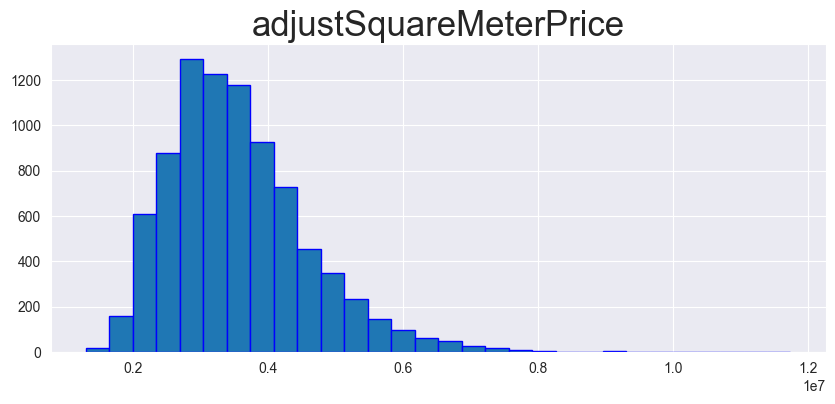

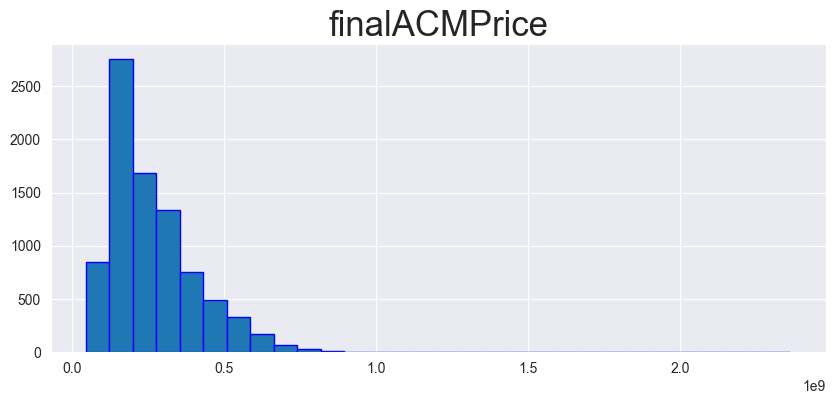

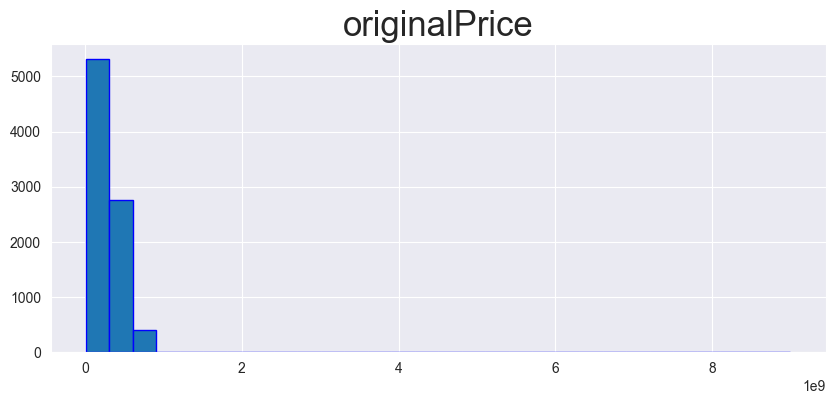

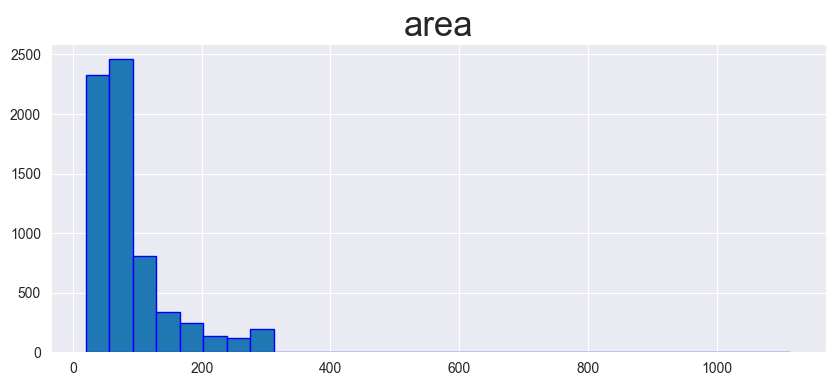

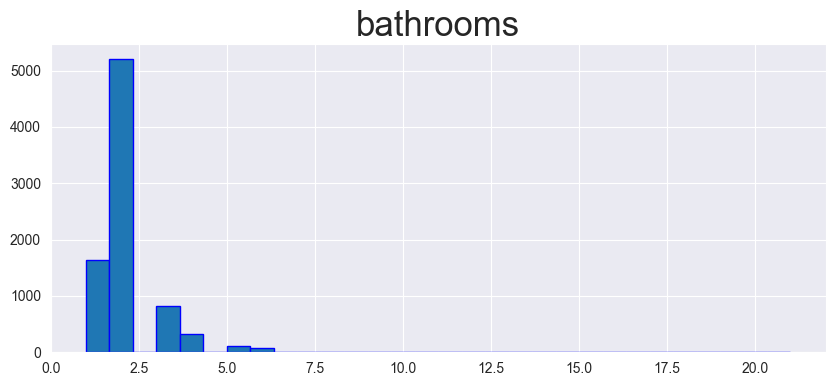

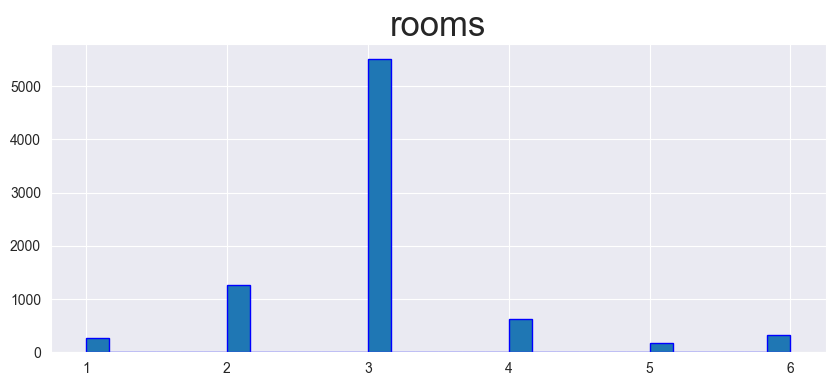

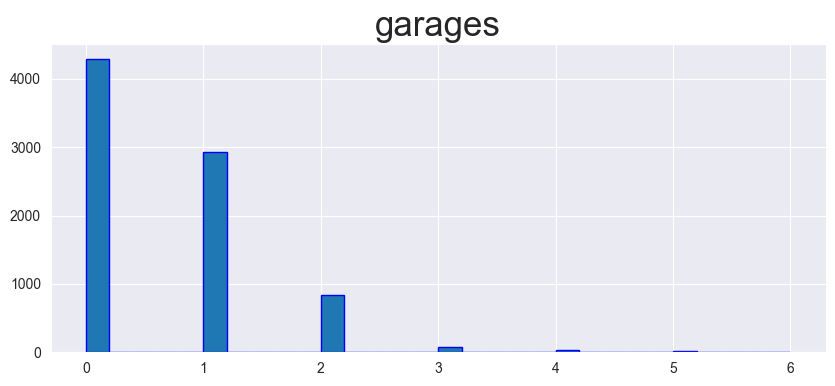

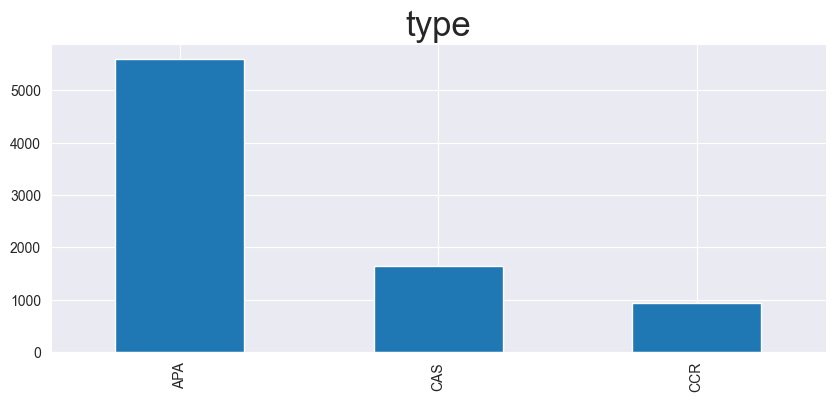

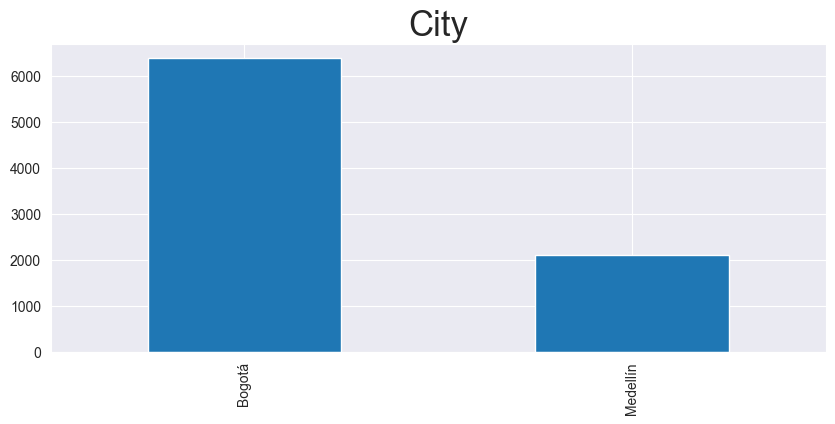

In [58]:
for i in numerical_features:
    desc_num_feature(i)

for i in categorical_features:
    desc_cat_feature(i)

In [59]:
# Convertir variable categorica en dummy

#dummy = pd.get_dummies(df2['type'], prefix='type')
#df2 = df2.drop('type', axis=1)
#df2 = pd.concat([df2, dummy], axis=1)

#dummy = pd.get_dummies(df2['City'], prefix='City')
#df2 = df2.drop('City', axis=1)
#df2 = pd.concat([df2, dummy], axis=1)


# Imputacion de datos faltantes
df2['area'] = df2['area'].fillna(round(df2['area'].median(), 1))
df2['bathrooms'] = df2['bathrooms'].fillna(round(df2['bathrooms'].median(), 1))
df2['rooms'] = df2['rooms'].fillna(round(df2['rooms'].mean(), 1))
df2['garages'] = df2['garages'].fillna(0)

#Revisar nulos
df2.isnull().sum()

id                          0
adjustSquareMeterPrice      0
finalACMPrice               0
originalPrice               0
area                        0
bathrooms                   0
rooms                       0
garages                     0
type                      295
City                        0
location                    0
dtype: int64

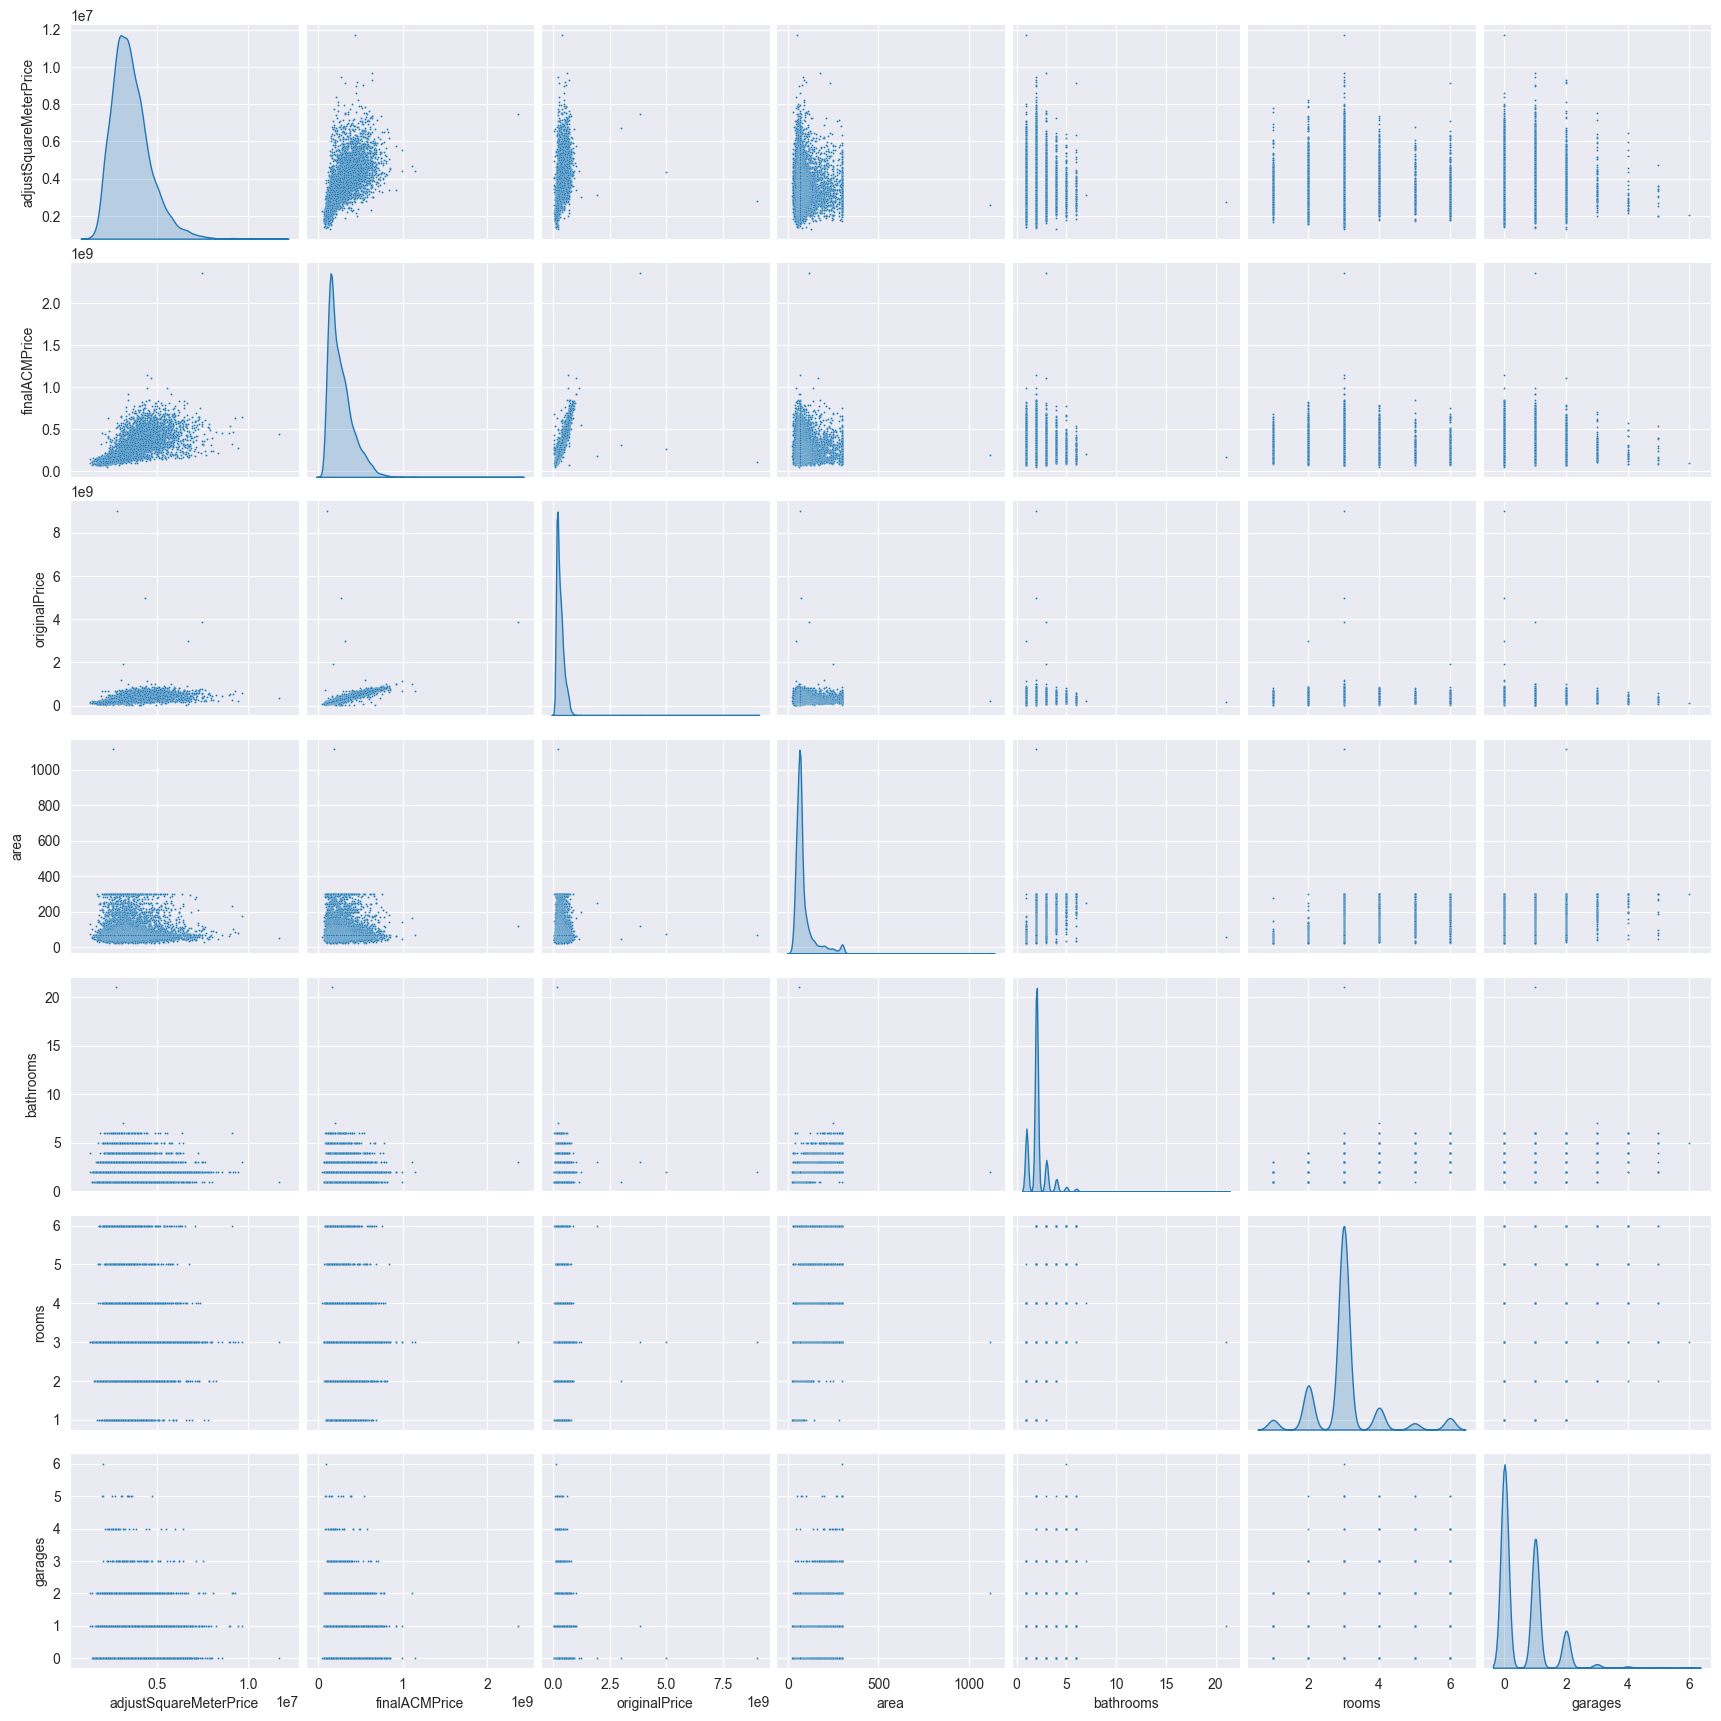

In [60]:
#CORRELACIONES
#graficos
#sns.pairplot(df2[numerical_features],plot_kws={"s":2})
sns.pairplot(df2[numerical_features],plot_kws={"s":2},diag_kind='kde')

In [61]:
#Matriz correlaciones
df2[numerical_features].corr()
df2

,id,adjustSquareMeterPrice,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,location
0,874,2.591867e+06,1.917364e+08,195000000,1115.0,2.0,3.0,2.0,APA,Medellín,POINT (-75.6356756 6.1266824)
1,33968,4.310643e+06,4.687536e+08,460000000,300.0,2.0,3.0,0.0,APA,Medellín,POINT (6.1435762684699 -75.616954237261)
2,33535,4.830501e+06,5.492026e+08,560000000,300.0,2.0,3.0,0.0,APA,Medellín,POINT (6.1798535721365 -75.586581230164)
3,33522,3.304656e+06,6.503699e+08,668000000,300.0,2.0,3.0,0.0,CAS,Medellín,POINT (4.8687603369878 -74.061080472327)
4,31178,3.758590e+06,2.854634e+08,360000000,300.0,1.0,3.0,0.0,CCR,Medellín,POINT (6.21812 -75.604164)
...,...,...,...,...,...,...,...,...,...,...,...
9865,589,3.061488e+06,2.188737e+08,240000000,67.0,2.0,3.0,0.0,NaN,Bogotá,POINT (-75.56715130806 6.3204597576276)
9866,588,3.388656e+06,2.157647e+08,235000000,67.0,2.0,3.0,0.0,NaN,Bogotá,POINT (-75.640155473016 6.1512008335329)
9867,584,6.081246e+06,2.570061e+08,260000000,67.0,2.0,3.0,0.0,NaN,Bogotá,POINT (-74.0643515 4.6408836)
9868,582,4.041076e+06,6.062614e+08,680000000,67.0,2.0,3.0,0.0,NaN,Bogotá,POINT (-75.627654484587 6.156958424577)


In [62]:
df2.to_csv('datos_depurados.csv')